# Random Forest

In [1]:
import pandas as pd 
import optuna 
import numpy as np
import matplotlib.pyplot as plt

import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

import os
import nbimporter
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

### Cremos primeramente un experimento con MLFLOW

In [3]:
MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

In [4]:
def get_or_create_experiment(experiment_name):
    """
    Retrieve the ID of an existing MLflow experiment or create a new one if it doesn't exist.
    """

    if experiment := mlflow.get_experiment_by_name(experiment_name):
        return experiment.experiment_id
    else:
        return mlflow.create_experiment(experiment_name)

In [5]:
experiment_id = get_or_create_experiment("random_forest_energy_demand_1")

Obtenemos los datos y tomamos una muestra para optimización de hiperparámetros

In [6]:
df = pd.read_csv('../data/processed/supervised_data_energy.csv')

Datos para optimización de hiperarámetros:

In [9]:
df_sample = df.sample(frac = 0.2)

In [10]:
X_study = df_sample[df_sample.columns[0:-1]]
y_study = df_sample[df_sample.columns[-1]]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_study, y_study, test_size=0.2, random_state=12)

Datos de entrenamiento y prueba:

In [11]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [12]:
run_name = "second_attempt"

Utilizando Optuna, definimos un estudio, declarando el espacio de hiperparámetros a explorar.

In [13]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 50, step = 2)
    max_depth = trial.suggest_int("max_depth", 5, 70, step = 2)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    # Create and fit random forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_s, y_train_s)

    # Make predictions and calculate MAPE
    y_pred = model.predict(X_test_s)
    mape = mean_absolute_percentage_error(y_test_s, y_pred)

    # Return MAPE
    return mape

In [14]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [15]:
with mlflow.start_run(experiment_id=experiment_id, run_name=run_name, nested=True):
    # Initialize the Optuna study
    # Create study object
    study = optuna.create_study(direction="minimize")

    # Run optimization process
    study.optimize(objective, n_trials=180, show_progress_bar=True)

    mlflow.log_params(study.best_params)
    mlflow.log_metric("best_mape", study.best_value)

    # Log tags
    mlflow.set_tags(
        tags={
            "project": "Energy Demand Prediction",
            "optimizer_engine": "optuna",
            "model_family": "random_forest",
            "feature_set_version": 1,
        }
    )

[I 2024-05-27 08:36:16,652] A new study created in memory with name: no-name-30de4eb6-5bff-4b65-bea9-318f22d40423


  0%|          | 0/180 [00:00<?, ?it/s]

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:37:48,596] Trial 0 finished with value: 0.012943566321821242 and parameters: {'n_estimators': 34, 'max_depth': 51, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.012943566321821242.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:38:35,222] Trial 1 finished with value: 0.012400308434027256 and parameters: {'n_estimators': 24, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:39:42,484] Trial 2 finished with value: 0.013578068955607998 and parameters: {'n_estimators': 48, 'max_depth': 35, 'min_samples_split': 15, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:40:39,231] Trial 3 finished with value: 0.012771835598957886 and parameters: {'n_estimators': 32, 'max_depth': 31, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:41:10,043] Trial 4 finished with value: 0.013862361711049638 and parameters: {'n_estimators': 24, 'max_depth': 57, 'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:41:46,815] Trial 5 finished with value: 0.01272481991565598 and parameters: {'n_estimators': 26, 'max_depth': 69, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:42:16,493] Trial 6 finished with value: 0.012450963790385045 and parameters: {'n_estimators': 20, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:42:41,275] Trial 7 finished with value: 0.012885458375372144 and parameters: {'n_estimators': 18, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:43:04,990] Trial 8 finished with value: 0.012506444939519096 and parameters: {'n_estimators': 14, 'max_depth': 33, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:43:37,014] Trial 9 finished with value: 0.014481001029221563 and parameters: {'n_estimators': 30, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 13}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:44:32,538] Trial 10 finished with value: 0.012791923279680074 and parameters: {'n_estimators': 42, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:44:47,440] Trial 11 finished with value: 0.012814255588096627 and parameters: {'n_estimators': 10, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:45:17,558] Trial 12 finished with value: 0.012605106968751757 and parameters: {'n_estimators': 20, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:45:34,440] Trial 13 finished with value: 0.018019503704704704 and parameters: {'n_estimators': 20, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:46:17,013] Trial 14 finished with value: 0.014157330972293204 and parameters: {'n_estimators': 38, 'max_depth': 47, 'min_samples_split': 15, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.012400308434027256.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:46:58,247] Trial 15 finished with value: 0.012284982264887685 and parameters: {'n_estimators': 26, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 15 with value: 0.012284982264887685.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:47:33,558] Trial 16 finished with value: 0.012715602673176512 and parameters: {'n_estimators': 26, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 15 with value: 0.012284982264887685.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:48:20,940] Trial 17 finished with value: 0.013182496743972589 and parameters: {'n_estimators': 38, 'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 15 with value: 0.012284982264887685.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:49:11,393] Trial 18 finished with value: 0.012210449080258713 and parameters: {'n_estimators': 30, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 18 with value: 0.012210449080258713.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:50:35,968] Trial 19 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:52:13,496] Trial 20 finished with value: 0.012178583111690388 and parameters: {'n_estimators': 50, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:53:51,610] Trial 21 finished with value: 0.012178583111690388 and parameters: {'n_estimators': 50, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:55:27,573] Trial 22 finished with value: 0.012178583111690388 and parameters: {'n_estimators': 50, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:56:59,689] Trial 23 finished with value: 0.01218005095916387 and parameters: {'n_estimators': 46, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:58:12,513] Trial 24 finished with value: 0.012103543562053577 and parameters: {'n_estimators': 44, 'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 08:59:26,581] Trial 25 finished with value: 0.012103543562053577 and parameters: {'n_estimators': 44, 'max_depth': 55, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:00:24,491] Trial 26 finished with value: 0.01250677582579764 and parameters: {'n_estimators': 42, 'max_depth': 63, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:01:32,600] Trial 27 finished with value: 0.012315886544905947 and parameters: {'n_estimators': 44, 'max_depth': 53, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:02:24,954] Trial 28 finished with value: 0.012505949563368014 and parameters: {'n_estimators': 38, 'max_depth': 63, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:03:23,262] Trial 29 finished with value: 0.012915816846904809 and parameters: {'n_estimators': 46, 'max_depth': 51, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:04:13,101] Trial 30 finished with value: 0.013204585663413022 and parameters: {'n_estimators': 40, 'max_depth': 49, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:05:30,383] Trial 31 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:06:46,450] Trial 32 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:08:02,018] Trial 33 finished with value: 0.01216274880160485 and parameters: {'n_estimators': 46, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:08:50,671] Trial 34 finished with value: 0.012413034359504919 and parameters: {'n_estimators': 34, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:10:08,338] Trial 35 finished with value: 0.01217944756496205 and parameters: {'n_estimators': 48, 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:11:21,777] Trial 36 finished with value: 0.012284517952358466 and parameters: {'n_estimators': 48, 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:12:10,459] Trial 37 finished with value: 0.013730707616831865 and parameters: {'n_estimators': 42, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:13:15,603] Trial 38 finished with value: 0.012123185878091717 and parameters: {'n_estimators': 36, 'max_depth': 61, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:14:18,311] Trial 39 finished with value: 0.012379386392510846 and parameters: {'n_estimators': 44, 'max_depth': 51, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:15:25,722] Trial 40 finished with value: 0.012609498113939613 and parameters: {'n_estimators': 48, 'max_depth': 31, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:16:39,258] Trial 41 finished with value: 0.012103543562053577 and parameters: {'n_estimators': 44, 'max_depth': 55, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:18:00,637] Trial 42 finished with value: 0.012132940270962273 and parameters: {'n_estimators': 46, 'max_depth': 59, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:18:59,705] Trial 43 finished with value: 0.012302471479805554 and parameters: {'n_estimators': 40, 'max_depth': 45, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:20:26,682] Trial 44 finished with value: 0.012094863628534866 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:21:57,165] Trial 45 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:23:06,131] Trial 46 finished with value: 0.01252743648392719 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:23:58,468] Trial 47 finished with value: 0.012803628325183496 and parameters: {'n_estimators': 40, 'max_depth': 35, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:25:05,636] Trial 48 finished with value: 0.012330889395662407 and parameters: {'n_estimators': 42, 'max_depth': 49, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:25:55,725] Trial 49 finished with value: 0.014146756317157028 and parameters: {'n_estimators': 46, 'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 20}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:27:10,031] Trial 50 finished with value: 0.012294015552332262 and parameters: {'n_estimators': 50, 'max_depth': 69, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:28:22,324] Trial 51 finished with value: 0.012103543562053577 and parameters: {'n_estimators': 44, 'max_depth': 55, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:29:34,996] Trial 52 finished with value: 0.012121953946371174 and parameters: {'n_estimators': 44, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:30:49,744] Trial 53 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 53, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:32:21,990] Trial 54 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 39, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:33:27,315] Trial 55 finished with value: 0.012382899465440408 and parameters: {'n_estimators': 46, 'max_depth': 43, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:34:47,188] Trial 56 finished with value: 0.012267434643375163 and parameters: {'n_estimators': 42, 'max_depth': 49, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:36:01,830] Trial 57 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 57, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:36:55,330] Trial 58 finished with value: 0.012308742307375107 and parameters: {'n_estimators': 36, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:37:16,897] Trial 59 finished with value: 0.012880124056656284 and parameters: {'n_estimators': 16, 'max_depth': 43, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:37:35,539] Trial 60 finished with value: 0.012938801963584953 and parameters: {'n_estimators': 10, 'max_depth': 47, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:38:51,844] Trial 61 finished with value: 0.012103543562053577 and parameters: {'n_estimators': 44, 'max_depth': 55, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:40:13,453] Trial 62 finished with value: 0.012111437548123152 and parameters: {'n_estimators': 44, 'max_depth': 53, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:41:29,969] Trial 63 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 59, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:42:45,841] Trial 64 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 59, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:44:00,847] Trial 65 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 59, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:45:37,723] Trial 66 finished with value: 0.012154162970554098 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:47:01,561] Trial 67 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:47:59,998] Trial 68 finished with value: 0.013450064473787429 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 14}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:49:31,020] Trial 69 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:50:42,338] Trial 70 finished with value: 0.012284517952358466 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:51:33,610] Trial 71 finished with value: 0.013933913661561445 and parameters: {'n_estimators': 46, 'max_depth': 63, 'min_samples_split': 3, 'min_samples_leaf': 18}. Best is trial 19 with value: 0.012091687875892205.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:52:53,559] Trial 72 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:53:31,032] Trial 73 finished with value: 0.012288126860134438 and parameters: {'n_estimators': 24, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:54:51,101] Trial 74 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:56:21,152] Trial 75 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:57:01,765] Trial 76 finished with value: 0.012468379303470207 and parameters: {'n_estimators': 28, 'max_depth': 69, 'min_samples_split': 2, 'min_samples_leaf': 6}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:58:17,931] Trial 77 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 63, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 09:59:37,112] Trial 78 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:01:21,708] Trial 79 finished with value: 0.012147743672829734 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:02:49,114] Trial 80 finished with value: 0.012094863628534866 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:04:18,023] Trial 81 finished with value: 0.012094863628534866 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:05:45,730] Trial 82 finished with value: 0.012094863628534866 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:07:21,166] Trial 83 finished with value: 0.012172607699863723 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:08:52,908] Trial 84 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:10:19,515] Trial 85 finished with value: 0.012094863628534866 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:11:43,470] Trial 86 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:13:06,384] Trial 87 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:14:20,440] Trial 88 finished with value: 0.012294015552332262 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:15:22,940] Trial 89 finished with value: 0.013057379553302925 and parameters: {'n_estimators': 50, 'max_depth': 63, 'min_samples_split': 3, 'min_samples_leaf': 11}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:16:39,673] Trial 90 finished with value: 0.012190266808814952 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:17:59,244] Trial 91 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:19:21,772] Trial 92 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:20:45,032] Trial 93 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:22:08,001] Trial 94 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 61, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:23:31,400] Trial 95 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 63, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:24:42,937] Trial 96 finished with value: 0.01216274880160485 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:25:57,250] Trial 97 finished with value: 0.012294015552332262 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:27:08,930] Trial 98 finished with value: 0.01216274880160485 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:28:22,059] Trial 99 finished with value: 0.012387403975115082 and parameters: {'n_estimators': 48, 'max_depth': 63, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:29:28,384] Trial 100 finished with value: 0.012502937367400114 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:30:52,186] Trial 101 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 61, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:32:15,140] Trial 102 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 61, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:33:32,847] Trial 103 finished with value: 0.012173779512340655 and parameters: {'n_estimators': 50, 'max_depth': 57, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 72 with value: 0.012089410260349839.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:34:52,512] Trial 104 finished with value: 0.012087486864930844 and parameters: {'n_estimators': 48, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:36:04,155] Trial 105 finished with value: 0.012284517952358466 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:37:16,840] Trial 106 finished with value: 0.012161225788450853 and parameters: {'n_estimators': 46, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:38:29,956] Trial 107 finished with value: 0.012412748954856858 and parameters: {'n_estimators': 48, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:39:42,763] Trial 108 finished with value: 0.012376654438913542 and parameters: {'n_estimators': 44, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:40:58,478] Trial 109 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:41:21,956] Trial 110 finished with value: 0.027547685448198 and parameters: {'n_estimators': 46, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:42:46,189] Trial 111 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:44:09,454] Trial 112 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 33, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:45:40,666] Trial 113 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 63, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:46:59,699] Trial 114 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:48:15,002] Trial 115 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:49:36,672] Trial 116 finished with value: 0.012107290946756354 and parameters: {'n_estimators': 46, 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:50:57,455] Trial 117 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 59, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:52:05,958] Trial 118 finished with value: 0.01227682191439457 and parameters: {'n_estimators': 46, 'max_depth': 59, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:53:27,112] Trial 119 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:54:45,320] Trial 120 finished with value: 0.01212458992928212 and parameters: {'n_estimators': 44, 'max_depth': 69, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:56:04,471] Trial 121 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:57:23,600] Trial 122 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 10:58:39,223] Trial 123 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:00:02,956] Trial 124 finished with value: 0.012123123127391396 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:01:04,975] Trial 125 finished with value: 0.012311403461590674 and parameters: {'n_estimators': 32, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:02:18,318] Trial 126 finished with value: 0.01216274880160485 and parameters: {'n_estimators': 46, 'max_depth': 69, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:03:40,505] Trial 127 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 63, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:04:58,117] Trial 128 finished with value: 0.01212458992928212 and parameters: {'n_estimators': 44, 'max_depth': 57, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:06:04,479] Trial 129 finished with value: 0.012248666404558463 and parameters: {'n_estimators': 42, 'max_depth': 63, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:07:17,166] Trial 130 finished with value: 0.01216962252355624 and parameters: {'n_estimators': 46, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:08:38,643] Trial 131 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:09:59,682] Trial 132 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:11:26,803] Trial 133 finished with value: 0.012094863628534866 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:12:46,135] Trial 134 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 59, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:14:02,429] Trial 135 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 59, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:15:18,526] Trial 136 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 59, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:16:31,738] Trial 137 finished with value: 0.012352067758367799 and parameters: {'n_estimators': 48, 'max_depth': 57, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:17:57,059] Trial 138 finished with value: 0.01210385137934272 and parameters: {'n_estimators': 46, 'max_depth': 63, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:18:30,935] Trial 139 finished with value: 0.01242468520241407 and parameters: {'n_estimators': 22, 'max_depth': 63, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:18:51,282] Trial 140 finished with value: 0.012767244299693958 and parameters: {'n_estimators': 12, 'max_depth': 61, 'min_samples_split': 12, 'min_samples_leaf': 1}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:20:11,240] Trial 141 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:21:30,762] Trial 142 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:22:44,947] Trial 143 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:24:02,327] Trial 144 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:25:26,240] Trial 145 finished with value: 0.012123123127391396 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:26:43,380] Trial 146 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 59, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:27:30,680] Trial 147 finished with value: 0.014156480203595214 and parameters: {'n_estimators': 44, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:28:56,198] Trial 148 finished with value: 0.012101897278073466 and parameters: {'n_estimators': 48, 'max_depth': 63, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:29:54,264] Trial 149 finished with value: 0.013322144082645272 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:31:11,044] Trial 150 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:32:30,939] Trial 151 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:33:46,767] Trial 152 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 63, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:35:02,896] Trial 153 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:36:22,717] Trial 154 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:37:41,898] Trial 155 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:38:55,967] Trial 156 finished with value: 0.01216274880160485 and parameters: {'n_estimators': 46, 'max_depth': 69, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:40:21,015] Trial 157 finished with value: 0.012101897278073466 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:41:53,612] Trial 158 finished with value: 0.012103543562053577 and parameters: {'n_estimators': 44, 'max_depth': 63, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:43:46,344] Trial 159 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 55, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:45:17,190] Trial 160 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:46:49,903] Trial 161 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:48:18,996] Trial 162 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:50:05,398] Trial 163 finished with value: 0.012101897278073466 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:51:45,907] Trial 164 finished with value: 0.012091687875892205 and parameters: {'n_estimators': 50, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:53:20,589] Trial 165 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:54:52,093] Trial 166 finished with value: 0.012173779512340655 and parameters: {'n_estimators': 50, 'max_depth': 63, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:56:32,250] Trial 167 finished with value: 0.01210385137934272 and parameters: {'n_estimators': 46, 'max_depth': 67, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:57:58,270] Trial 168 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 57, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 11:59:15,663] Trial 169 finished with value: 0.012166081683821389 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:00:37,792] Trial 170 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 59, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:02:02,899] Trial 171 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:03:34,398] Trial 172 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 65, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:04:51,573] Trial 173 finished with value: 0.0126449309912058 and parameters: {'n_estimators': 50, 'max_depth': 67, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:06:06,241] Trial 174 finished with value: 0.012777591669065221 and parameters: {'n_estimators': 48, 'max_depth': 69, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:07:28,278] Trial 175 finished with value: 0.01216274880160485 and parameters: {'n_estimators': 46, 'max_depth': 63, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:09:15,535] Trial 176 finished with value: 0.012107475934130254 and parameters: {'n_estimators': 50, 'max_depth': 65, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:10:48,067] Trial 177 finished with value: 0.012089410260349839 and parameters: {'n_estimators': 48, 'max_depth': 61, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:12:18,628] Trial 178 finished with value: 0.012095484937240846 and parameters: {'n_estimators': 46, 'max_depth': 67, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:700: UserWarning: The distribution is specified by [5, 70] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 69].
  warnings.warn(


[I 2024-05-27 12:13:11,375] Trial 179 finished with value: 0.012217736162445796 and parameters: {'n_estimators': 28, 'max_depth': 63, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 104 with value: 0.012087486864930844.


In [19]:
# Import optuna.visualization
import optuna.visualization as vis

# Plot optimization history
fig_1 = vis.plot_optimization_history(study) 
fig_1

In [17]:
fig_2 = vis.plot_param_importances(study)
fig_2

In [21]:
fig_3 = vis.plot_contour(study, params=['max_depth', 'min_samples_leaf', 'n_estimators', 'min_samples_split'])
fig_3.update_layout({"width":1200, "height":1200})
def update_colorscale(trace):
    try:
        trace["colorscale"]= "Tealrose"
        trace["reversescale"]= False
    except:
        pass
fig_3.for_each_trace(update_colorscale)

In [23]:
vis.plot_parallel_coordinate(study)

In [24]:
vis.plot_contour(study, params=['max_depth', 'min_samples_leaf'])

In [28]:
study.trials_dataframe().to_csv('Trials.csv')

In [29]:
with mlflow.start_run(run_id="38eac4d8cd544c548608bf7c98a24cad") as run:
    mlflow.log_artifact('Hyperparameter_importance.png')
    mlflow.log_artifact('Optimization_history.png')
    mlflow.log_artifact('Parallel_Coordinate_Plot.png')
    mlflow.log_artifact('Plot_contour.png')
    mlflow.log_artifact('Contour_plots.png')
    mlflow.log_artifact('Trials.csv')

In [30]:
study.best_params

{'n_estimators': 48,
 'max_depth': 23,
 'min_samples_split': 3,
 'min_samples_leaf': 3}

In [33]:
best_model = RandomForestRegressor(n_estimators= 48,
 max_depth= 23,
 min_samples_split= 3,
 min_samples_leaf=3)

In [34]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=23, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=48)

In [35]:
y_pred = best_model.predict(X_test)

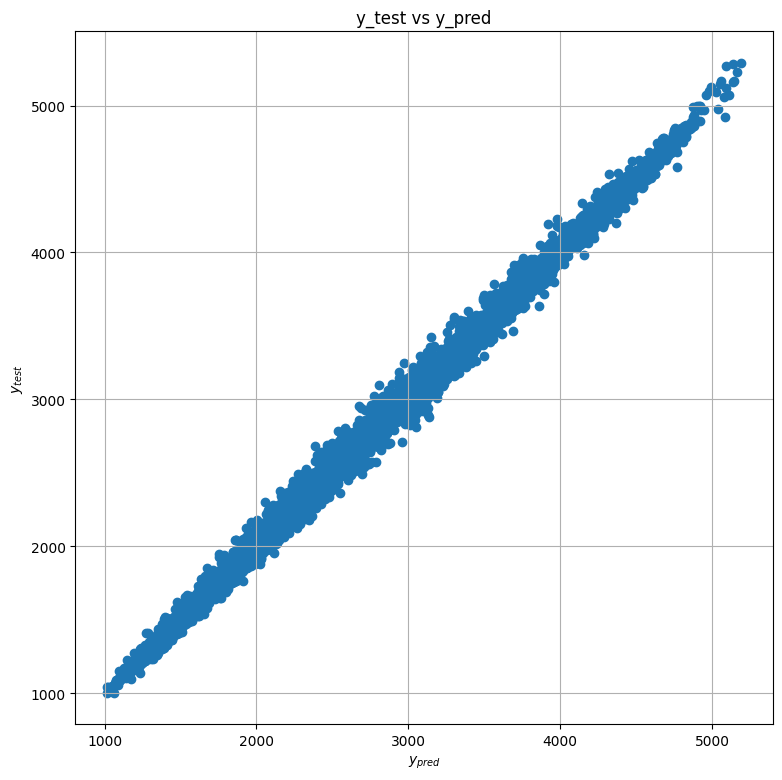

In [36]:
fig_1,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.scatter(y_pred, y_test)
ax.set_ylabel(r'$y_{test}$')
ax.set_xlabel(r'$y_{pred}$')
plt.title('y_test vs y_pred')
plt.show()

In [37]:
error = np.abs(y_test - y_pred)

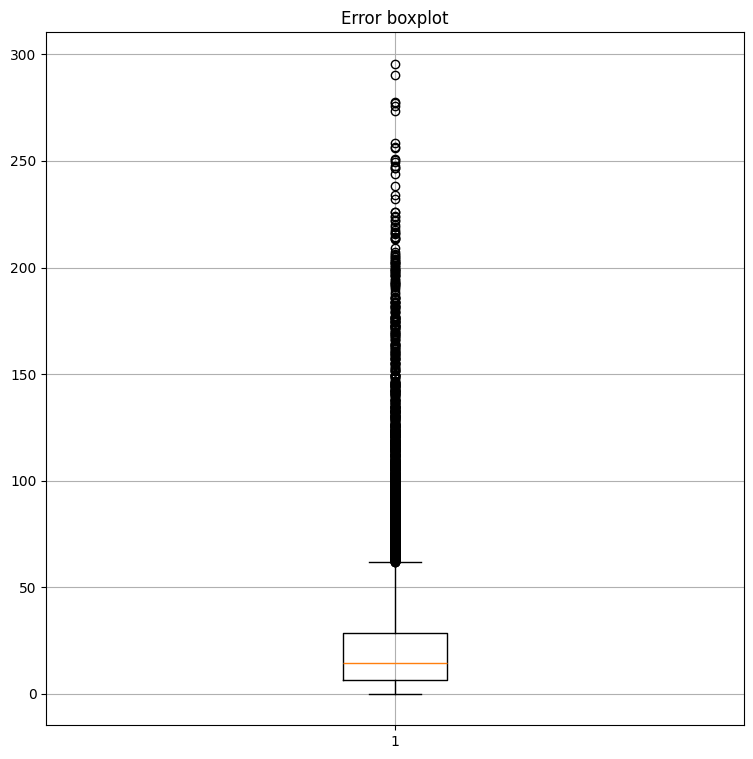

In [38]:
fig_2,ax = plt.subplots(figsize=(9,9))
ax.grid()
ax.boxplot(error)
plt.title('Error boxplot')
plt.show()

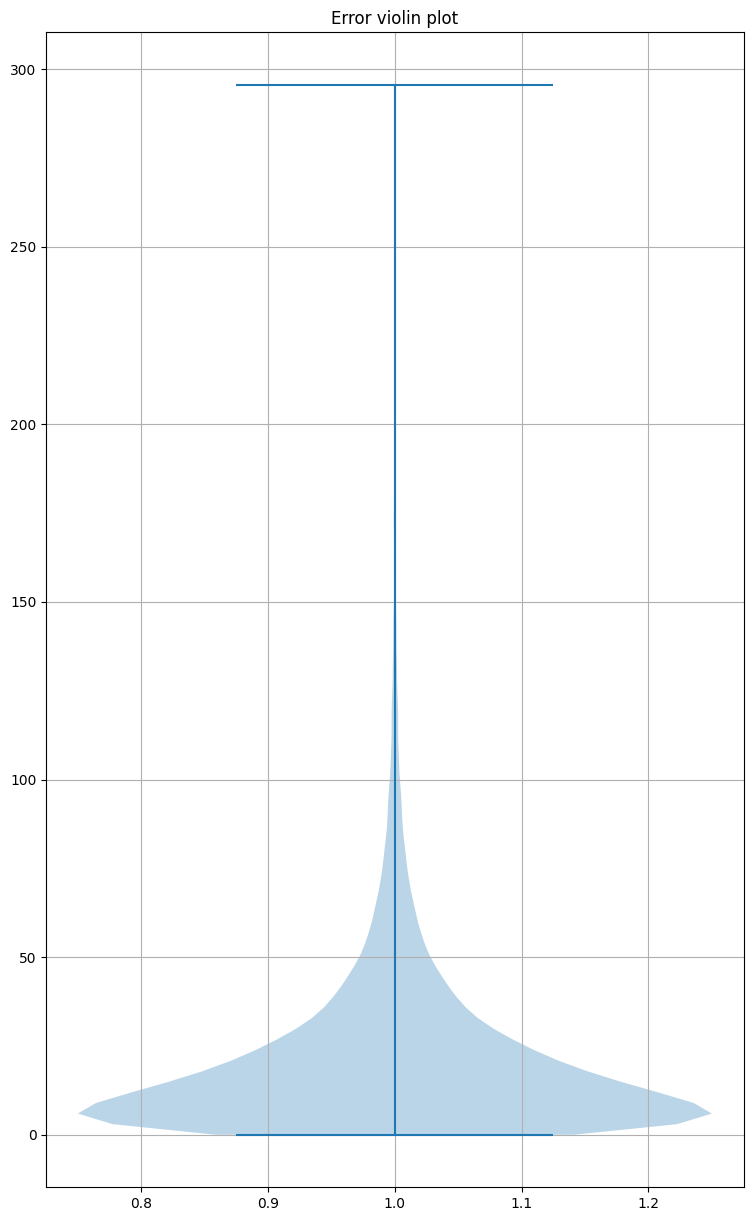

In [42]:
fig_3,ax = plt.subplots(figsize=(9,15))
ax.grid()
ax.violinplot(error)
plt.title('Error violin plot')
plt.show()

In [95]:
mlflow.log_figure(fig_3, artifact_file="Error_violinplot.png")

In [43]:
print(f'El error máximo fué {np.max(error)}')
print(f'El error mínimo fué {np.min(error)}')
print(f'El error promedio fué {np.mean(error)}')
print(f'La desviación estándar del error fue {np.std(error)}')

El error máximo fué 295.5879638879637
El error mínimo fué 0.0010651963780219376
El error promedio fué 22.464187154089363
La desviación estándar del error fue 26.220167853093884


In [44]:
mean_absolute_percentage_error(y_pred, y_test)

0.009365561601741904

In [45]:
with mlflow.start_run(run_id="38eac4d8cd544c548608bf7c98a24cad") as run:
    mlflow.log_artifact('y_test_y_pred.png')
    mlflow.log_artifact('error_boxplot.png')
    mlflow.log_artifact('violin_plot.png')
    mlflow.log_metric("final_test_mape", mean_absolute_percentage_error(y_pred, y_test))
    mlflow.log_metric("final_mean_absolute_error", np.mean(error))

In [46]:
mlflow.end_run()